#                              Customer Churn Prediction

**Problem Statement**


Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.
The company wants to predict which customers are likely to churn so they can take proactive measures to retain them. As a data scientist, your task is to build a predictive model that can accurately identify customers who are likely to churn based on historical data such as customer demographics, usage patterns, and customer support interactions. The model should be able to classify customers as 'churn' or 'no churn' and provide insights into the key factors driving customer churn.The goal is to reduce churn rate and improve customer retention.
    
    

In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
customer_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Overview

In [4]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Manipulation



In [7]:
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# Classifying No internet seevice as No for the below columns
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
for values in cols:
    customer_churn[values] = customer_churn[values].replace({"No internet service":"No"})

In [10]:
for col in customer_churn.columns:
    print(col)
    print(customer_churn[col].unique(),"\n")

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender
['Female' 'Male'] 

SeniorCitizen
[0 1] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes'] 

OnlineBackup
['Yes' 'No'] 

DeviceProtection
['No' 'Yes'] 

TechSupport
['No' 'Yes'] 

StreamingTV
['No' 'Yes'] 

StreamingMovies
['No' 'Yes'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

TotalCharges
['29.85' '18

In [11]:
customer_churn['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [12]:
# Dealing with null value in Total Charges Column- Deleting entries which has null values and changing the data type
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].replace(" ", np.nan)
customer_churn = customer_churn[customer_churn['TotalCharges'].notnull()]
customer_churn = customer_churn.reset_index()[customer_churn.columns]
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype(float)

In [13]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Exploratory Data Analysis

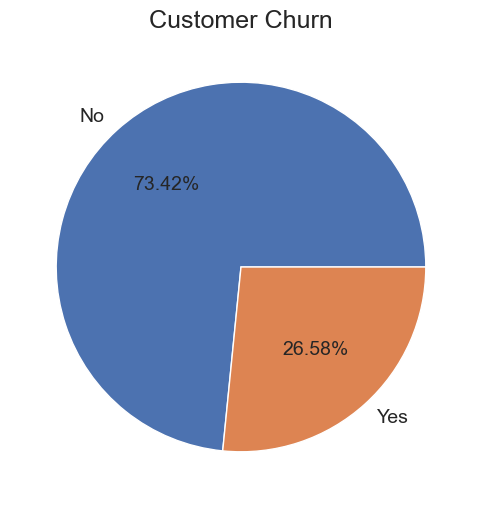

In [14]:
# Customer attrition percentage
textprops = {'fontsize': 14}
churn_counts = customer_churn['Churn'].value_counts()
plt.figure(figsize =(6,6))
plt.pie(churn_counts,labels=churn_counts.index,autopct='%1.2f%%',textprops = textprops)
plt.title('Customer Churn',fontsize =18)
plt.rcParams['font.size'] = 20
plt.show()

Looking at above pie chart nearly 27% of total customers have churned

**Distribution of Monthly Charges, Total Charges and tenure**

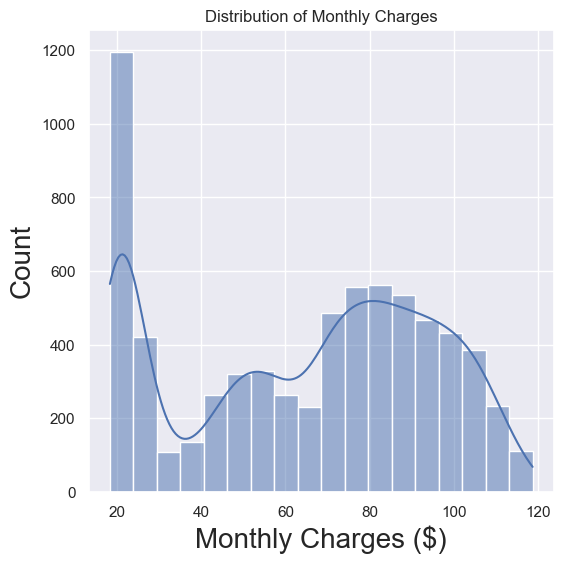

In [15]:
plt.figure(figsize =(6,6))
sns.histplot(customer_churn['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.show()

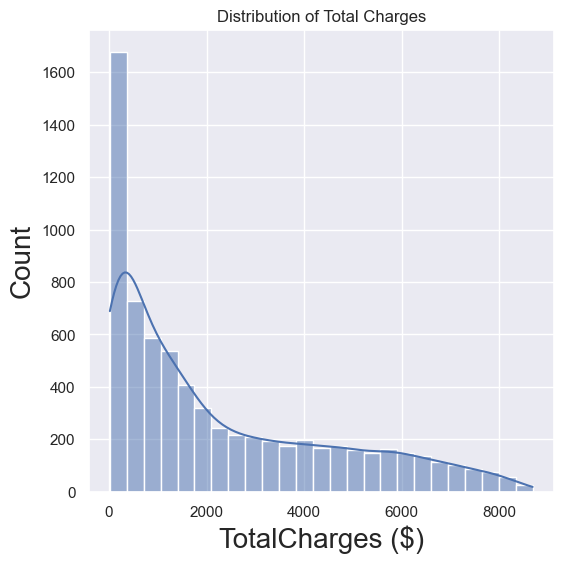

In [16]:
plt.figure(figsize =(6,6))
sns.histplot(customer_churn['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('TotalCharges ($)')
plt.ylabel('Count')
plt.show()

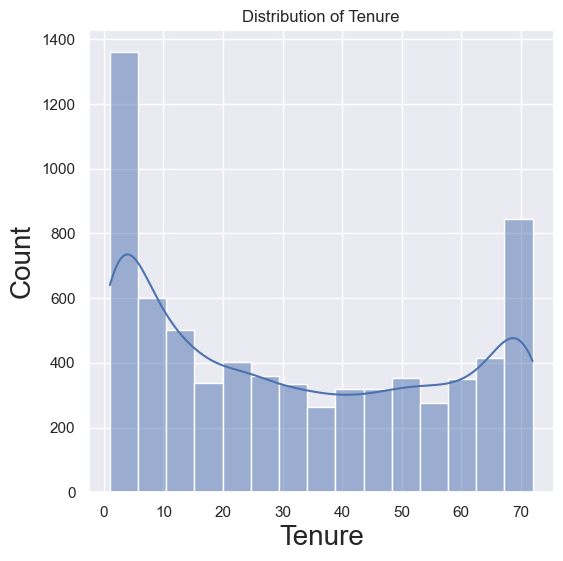

In [17]:
plt.figure(figsize =(6,6))
sns.histplot(customer_churn['tenure'], kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

In [18]:
# Removing The Customer ID column
df = customer_churn.iloc[:,1:]
# Replacing Churn Yes & No with numeric 1 & 0 respectively
df['Churn'].replace({'Yes':1,'No':0},inplace = True)
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


**Correlation of Dependent Variable and all Independent Variables**

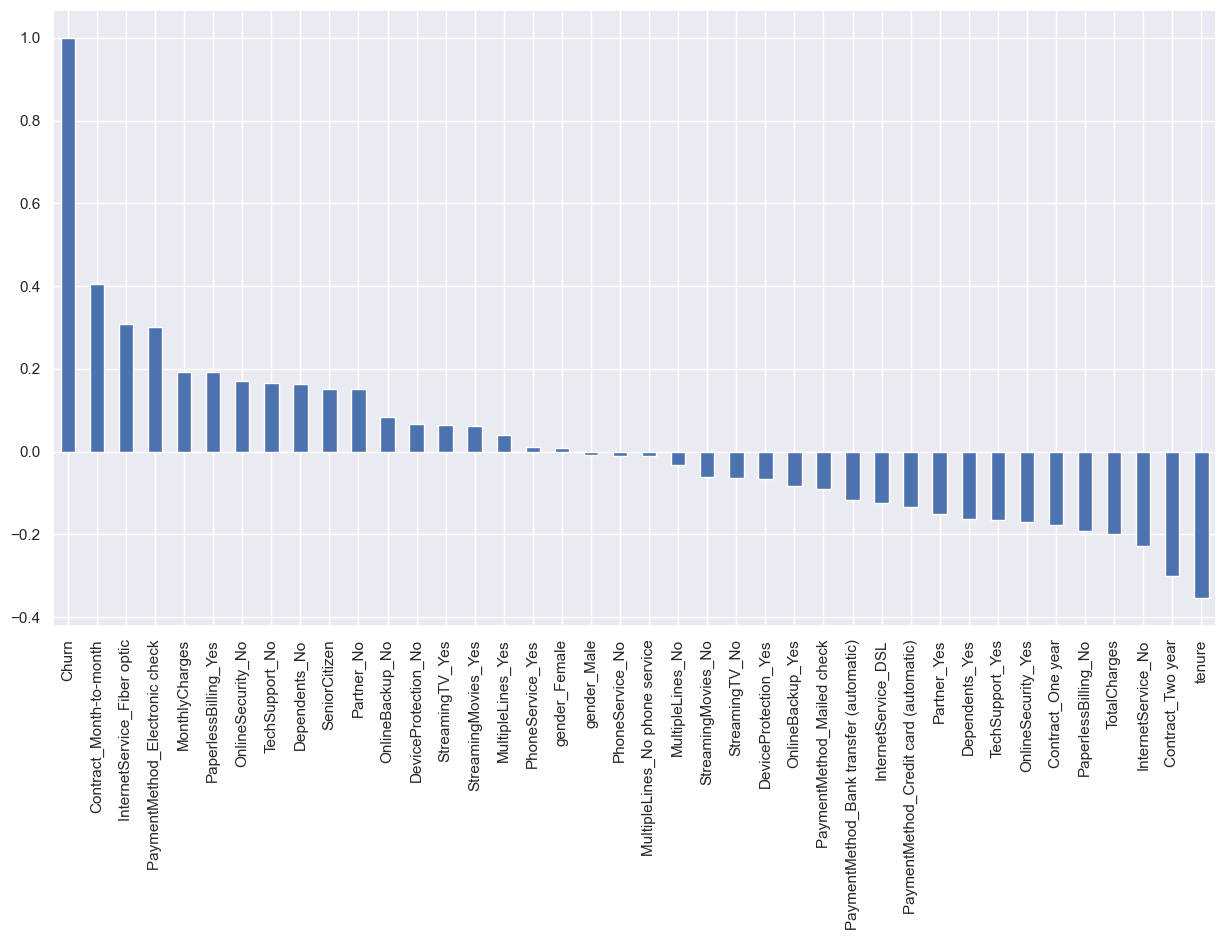

In [19]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

From the above chart, we could see Month-to-Month Contract,Internet Service,Fiber Optic are postively correlated with churn.

While,tenure,Two year contract ,No Internet Serice are negatively correlated with churn.

With respect to billing method, Paperless billing is postively correlated and paper billing is negatively correlated.

Interestingly, services like TechSupport & Online Security are negatively correlated with churn.

**Distribution of various services used by customers**

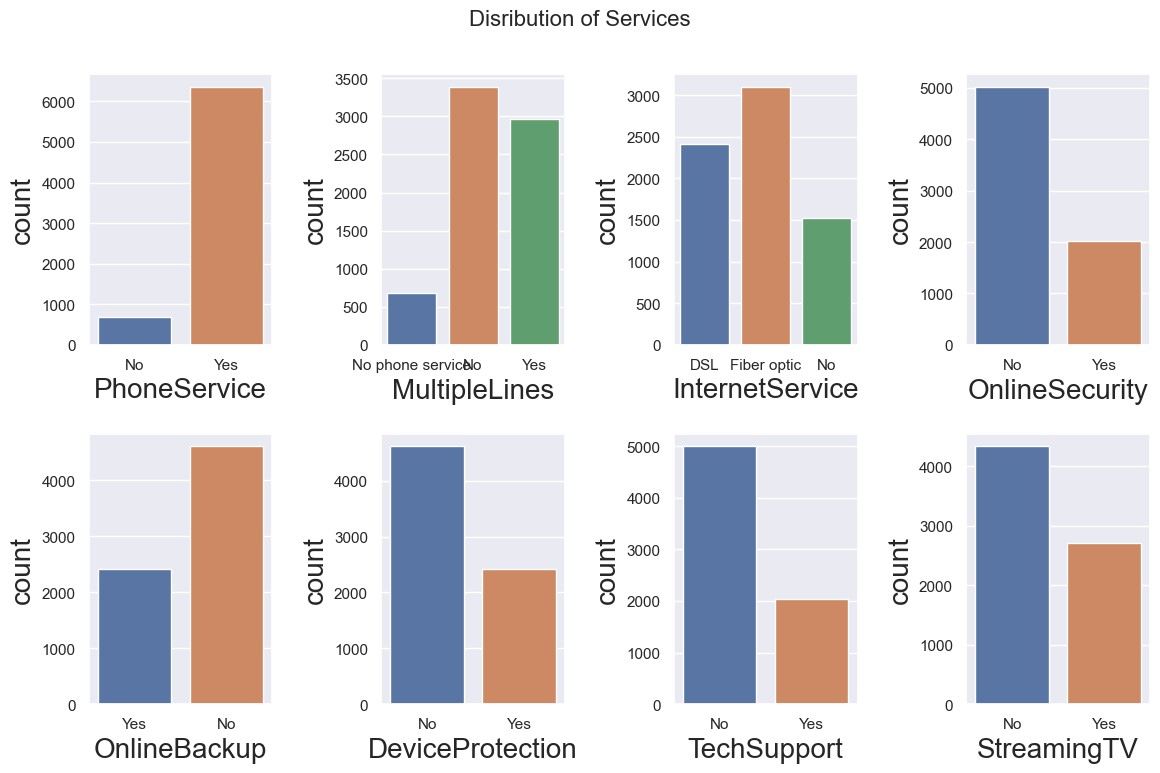

In [20]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(services):
    sns.countplot(x=var,  data=customer_churn, ax=axs[i])
plt.suptitle('Disribution of Services', fontsize=16)
plt.tight_layout()

**Distribution of Demographic variables**

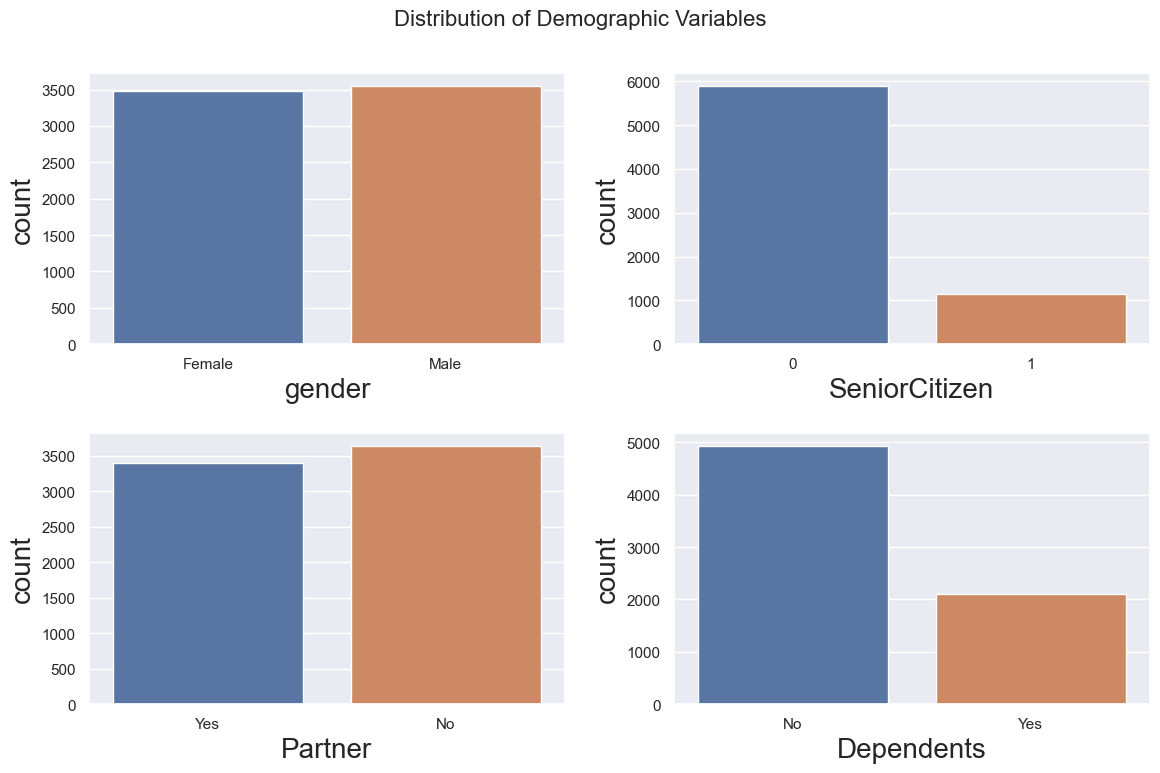

In [21]:
demographic_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(demographic_vars):
    sns.countplot(x=var, data=customer_churn, ax=axs[i])
plt.suptitle('Distribution of Demographic Variables', fontsize=16)
plt.tight_layout()

About half of the customers in our data set are male while the other half are female. Percentage of Customers who are Senior citizens are less in our data.

**Visualization of Dependent Variable(Churn) with respect to independent variables**

<Figure size 1500x800 with 0 Axes>

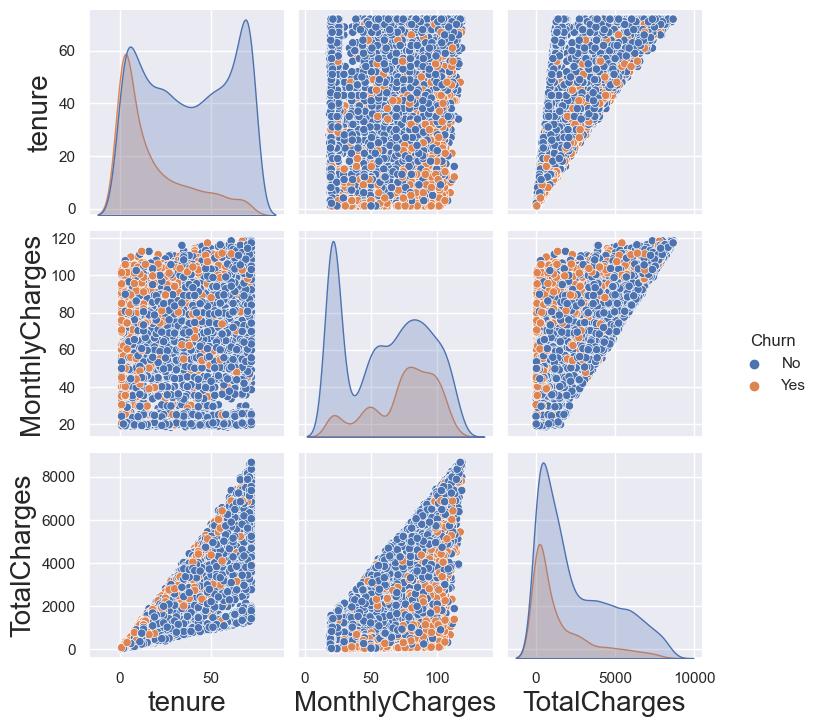

In [22]:
plt.figure(figsize =(15,8))
sns.pairplot(customer_churn[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', diag_kind='kde')
plt.show()

In the above plot generated,we can see that the distribution of the tenure variable is positively skewed, indicating that most customers have been with the company for a relatively short period of time. We can also see that there is a strong positive correlation between totalcharges and monthlycharges, which is to be expected.

Looking at the off-diagonal plots, we can see that customers who churned tend to have shorter tenure ,lower total charges and high monthly charges. There also appears to be a weak negative correlation between tenure and churn, indicating that customers who have been with the company for longer are less likely to churn.

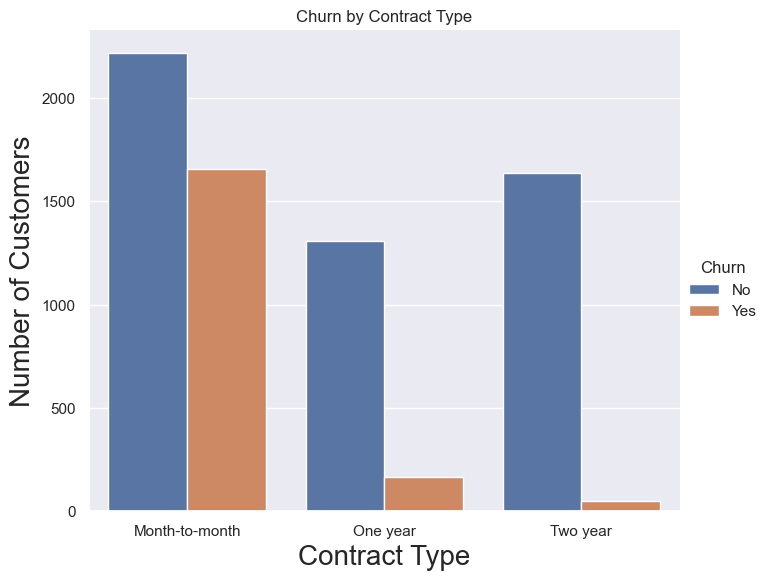

In [23]:
sns.catplot(x='Contract', hue='Churn', kind='count', data=customer_churn, height=6, aspect=1.2)
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.title('Churn by Contract Type')
plt.show()

From the above chart it is clear that customers on a monthly basis are more likely to churn when compared to one year and 2 year contract customers.

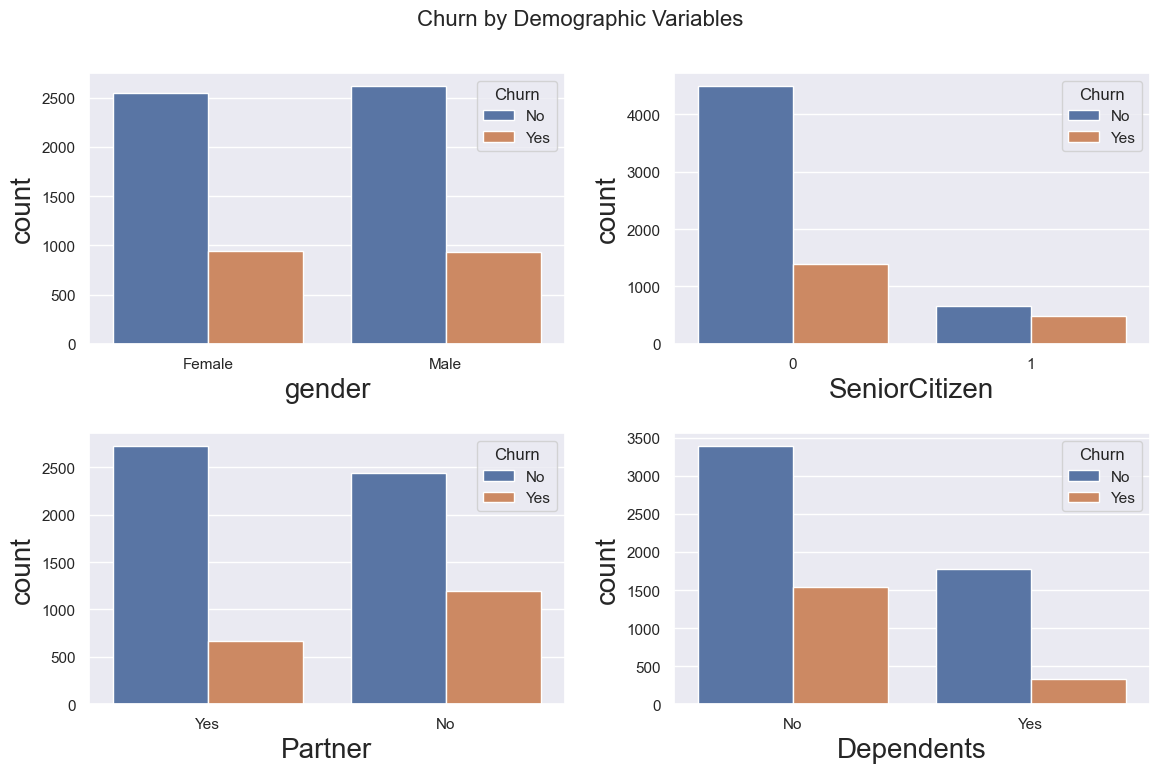

In [24]:
demographic_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(demographic_vars):
    sns.countplot(x=var, hue='Churn', data=customer_churn, ax=axs[i])
plt.suptitle('Churn by Demographic Variables', fontsize=16)
plt.tight_layout()

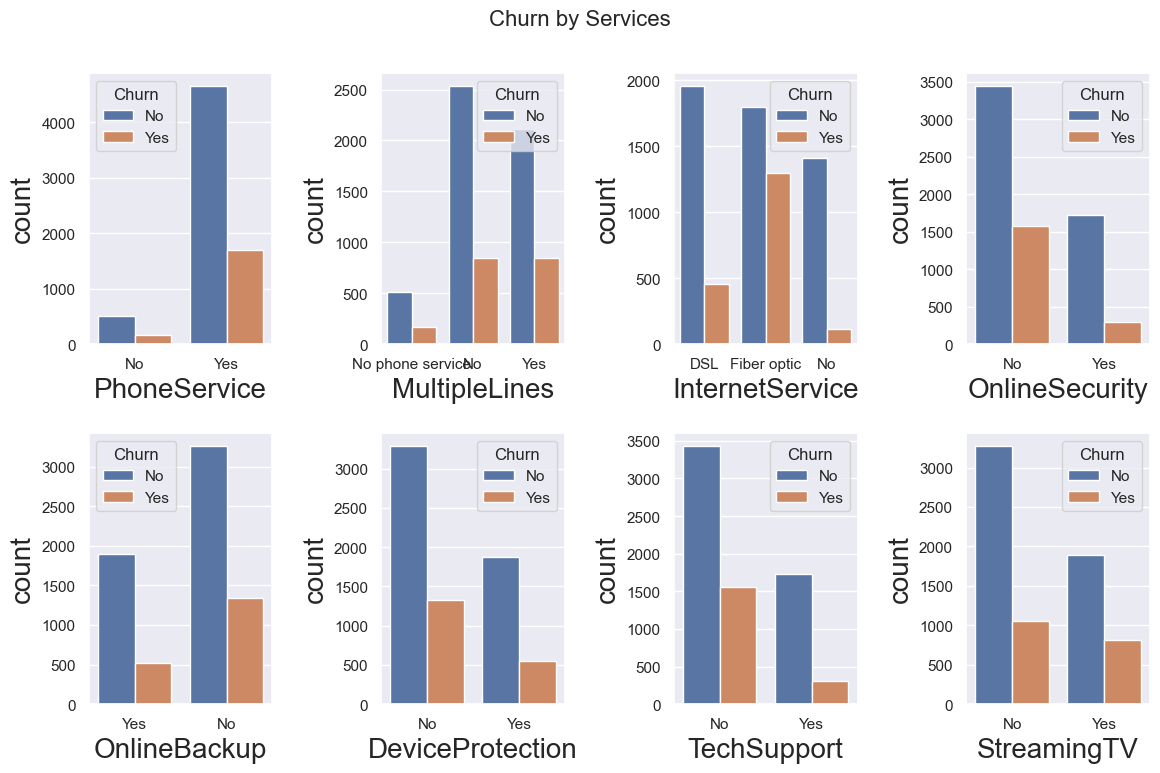

In [25]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
axs = axs.flatten()
for i, var in enumerate(services):
    sns.countplot(x=var, hue='Churn', data=customer_churn, ax=axs[i])
plt.suptitle('Churn by Services', fontsize=16)
plt.tight_layout()

**Converting categorial variables into Numerical variables using One Hot Encoding**

In [26]:
customer_churn = pd.get_dummies(customer_churn, columns=['gender','Partner', 
                                                         'Dependents','PhoneService', 
                                                         'MultipleLines', 'InternetService',
                                                         'OnlineSecurity', 'OnlineBackup', 
                                                         'DeviceProtection', 'TechSupport',
                                                         'StreamingTV', 'StreamingMovies', 
                                                         'Contract', 'PaperlessBilling',
                                                         'PaymentMethod'],
                               drop_first=True)

In [27]:
customer_churn.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,No,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [28]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   tenure                                 7032 non-null   int64  
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7032 non-null   object 
 6   gender_Male                            7032 non-null   uint8  
 7   Partner_Yes                            7032 non-null   uint8  
 8   Dependents_Yes                         7032 non-null   uint8  
 9   PhoneService_Yes                       7032 non-null   uint8  
 10  MultipleLines_No phone service         7032 non-null   uint8  
 11  Mult

In [29]:
# Replacing dependent column(Churn) of values Yes with 1 and No with 0
customer_churn['Churn'].replace({'Yes':1,'No':0},inplace = True)

In [30]:
customer_churn.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [31]:
# Splitting the data into dependent and independent variables
x = customer_churn.drop(['customerID','Churn'], axis=1)
y = customer_churn['Churn']

In [32]:
y.info()


<class 'pandas.core.series.Series'>
RangeIndex: 7032 entries, 0 to 7031
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7032 non-null   int64
dtypes: int64(1)
memory usage: 55.1 KB


**Applying SMOTE technique to handle imbalance dataset**

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)

In [34]:
print(y_smote.value_counts())

0    5163
1    5163
Name: Churn, dtype: int64


**Splitting the data into training and test for building the model and predicting with test data**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, random_state=101)

**Scaling the independent features**

In [37]:
from sklearn.preprocessing import StandardScaler
standard_Scaler=StandardScaler()
x_train = standard_Scaler.fit_transform(x_train)
x_test = standard_Scaler.transform(x_test)

**Buiding various classification models and comparing its performance**

**1. Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_train_lg = log.predict(x_train)
y_test_lg = log.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Training Accuracy of Logistic Regression is :{accuracy_score(y_train, y_train_lg)*100:.2f}%")
print("***************"*8)
print(f"Test Accuracy of Logistic Regression is : {accuracy_score(y_test, y_test_lg)*100:.2f}%")

Training Accuracy of Logistic Regression is :83.55%
************************************************************************************************************************
Test Accuracy of Logistic Regression is : 84.31%


In [40]:
print("Classification report- Test Data \n")
print(classification_report(y_test, y_test_lg))

Classification report- Test Data 

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1285
           1       0.83      0.87      0.85      1297

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582



In [41]:
confusion_matrix(y_test, y_test_lg)

array([[1055,  230],
       [ 175, 1122]], dtype=int64)

**2.Decision Tree**

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [43]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [44]:
print(f"Training Accuracy of Decision Tree is :{accuracy_score(y_train, y_pred_train)*100:.2f}%")
print("***************"*8)
print(f"Test Accuracy of Decision Tree is : {accuracy_score(y_test, y_pred_test)*100:.2f}%")

Training Accuracy of Decision Tree is :99.85%
************************************************************************************************************************
Test Accuracy of Decision Tree is : 78.93%


In [45]:
print("Classification report- Test Data \n")
print(classification_report(y_test, y_pred_test))

Classification report- Test Data 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1285
           1       0.79      0.79      0.79      1297

    accuracy                           0.79      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.79      0.79      0.79      2582



**3. Random Forest**

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,criterion='entropy',oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, oob_score=True)

In [47]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [48]:
print(f"Training Accuracy of Random Forest is :{accuracy_score(y_train, y_pred_rf_train)*100:.2f}%")
print("***************"*8)
print(f"Test Accuracy of Random Forest is : {accuracy_score(y_test, y_pred_rf_test)*100:.2f}%")

Training Accuracy of Random Forest is :99.85%
************************************************************************************************************************
Test Accuracy of Random Forest is : 84.74%


In [49]:
print("Classification report- Test Data \n")
print(classification_report(y_test, y_pred_rf_test))

Classification report- Test Data 

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1285
           1       0.84      0.86      0.85      1297

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582



When Compared to Logistic regression and Decision Tree, Random Forest performed well using criterion as Entropy. We will futher use grid search CV and randomized search CV to check if we can improve the model performance.

**Grid Search CV**

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
param_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']}

In [51]:
rf_grid = RandomForestClassifier(random_state=101)
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [52]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 300}


In [53]:
rf_best = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='auto', criterion='gini', random_state=101)
rf_best.fit(x_train, y_train)
y_pred = rf_best.predict(x_test)

In [54]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8369481022463207
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1285
           1       0.81      0.88      0.84      1297

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582

Confusion Matrix:
[[1023  262]
 [ 159 1138]]


**4. K-Nearest Neighbour**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [56]:
pred_knn_train = knn.predict(x_train)
pred_knn_test = knn.predict(x_test)

In [57]:
print(f"Training Accuracy of KNN is :{accuracy_score(y_train, pred_knn_train)*100:.2f}%")
print("***************"*8)
print(f"Test Accuracy of KNN is : {accuracy_score(y_test, pred_knn_test)*100:.2f}%")

Training Accuracy of KNN is :82.58%
************************************************************************************************************************
Test Accuracy of KNN is : 82.77%


**5. SVM**

In [58]:
from sklearn.svm import SVC
svc = SVC(random_state = 1)
svc.fit(x_train,y_train)
pred_svc_train = svc.predict(x_train)
pred_svc_test = svc.predict(x_test)

In [59]:
print(f"Training Accuracy of SVM is :{accuracy_score(y_train, pred_svc_train)*100:.2f}%")
print("***************"*8)
print(f"Test Accuracy of SVM is : {accuracy_score(y_test, pred_svc_test)*100:.2f}%")

Training Accuracy of SVM is :85.54%
************************************************************************************************************************
Test Accuracy of SVM is : 83.46%


**6. XgBoost**

In [60]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
preds_train_xg = model.predict(x_train)
preds_test_xg = model.predict(x_test)
print(f"Train Accuracy of Xgboost is : {accuracy_score(y_train, preds_train_xg)*100:.2f}%")
print(f"Test Accuracy of Xgboost is : {accuracy_score(y_test, preds_test_xg)*100:.2f}%")

Train Accuracy of Xgboost is : 95.14%
Test Accuracy of Xgboost is : 84.59%


**Randomized Search CV- XGBoost**

In [61]:
params_xg = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4, 5],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    'n_estimators': [100, 500, 1000, 1500, 2000]
}
xgb = XGBClassifier()

In [62]:
random_search = RandomizedSearchCV(xgb, param_distributions=params_xg, n_iter=50, scoring='accuracy', 
                                   n_jobs=-1, cv=5, verbose=3, random_state=42)

In [63]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.06,
                                                          0.07, 0.08, 0.09,
                                                          0.1],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 500, 1000, 1500,
                                                         2000],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1]},
                   random_state=42, scoring='accuracy', verbose=3)

In [64]:
print(random_search.best_params_)

{'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 2, 'max_depth': 7, 'learning_rate': 0.03, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [65]:
xg_best = XGBClassifier(subsample=0.8, n_estimators=1000, min_child_weight=2, max_depth=7, learning_rate=0.03, gamma=0.2, colsample_bytree=0.8)
xg_best.fit(x_train, y_train)
pred_xg_train = xg_best.predict(x_train)
pred_xg_test = xg_best.predict(x_test)

In [66]:
print(f"Train Accuracy of Xgboost is : {accuracy_score(y_train, pred_xg_train)*100:.2f}%")
print(f"Test Accuracy of Xgboost is : {accuracy_score(y_test, pred_xg_test)*100:.2f}%")

Train Accuracy of Xgboost is : 96.68%
Test Accuracy of Xgboost is : 85.21%


In [67]:
print("Classification Report:")
print(classification_report(y_test, pred_xg_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1285
           1       0.85      0.86      0.85      1297

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582



Xgboost with hyper parameter tuning  performed well when compared to other models on both train and test data.